In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
import DataAnalysis as da

In [3]:
# Calculate Metal Tube Volume
caliperError = .1
metalTubeHeight = ufloat(11.04, caliperError)
metalTubeDiameter = ufloat(4.5, caliperError)
rubberStoperInsertion = ufloat(1.13, caliperError)
metalTubeVolume = (metalTubeHeight - rubberStoperInsertion)*(metalTubeDiameter/2.0)**2*np.pi
print(metalTubeVolume)

158+/-7


In [4]:
tubeOffset = 7.4 # revise as needed
volumeInGlass = lambda x: (ufloat(3.35, .01)/2)**2*np.pi*(x+ufloat(.64, .01))
volume_func = lambda x: volumeInGlass(x) +  tubeOffset + metalTubeVolume

# Experiment 1 Trial 1

In [9]:
height_markers = [40.5, 50, 36.5, 12, 15]
volume = [volume_func(x/10) for x in height_markers]
temp = [x+273.15 for x in [23.6, 48.7, 27.7, 1.3, 14.9]]

In [13]:
volume_val, volume_error = da.seperate_uncertainty_array(volume)
[m, c], [m_err, c_err], [y_pred, res], [chi_squared] = da.weighted_least_squares_linear(volume_val, temp, volume_error)
print(da.correlation_coefficients(temp, volume_val))
print(chi_squared/2)

m = 1.1±0.25, c = 7.9e+01±5e+01, Χ² = 3.5
Equation: y = (1.1±0.25)*x + (7.9e+01±5e+01)
0.9177639781092988
1.774117376832557


/tmp/ipykernel_122747/1187327013.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


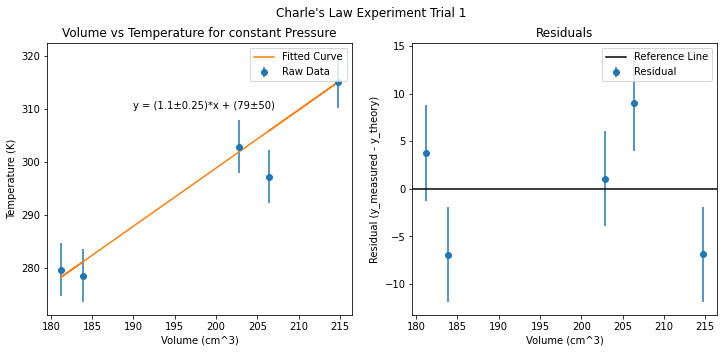

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle("Charle's Law Experiment Trial 1")
ax[0].set_title("Volume vs Temperature for constant Pressure")
ax[0].set_xlabel("Volume (cm^3)")
ax[0].set_ylabel("Temperature (K)")
ax[0].errorbar(volume_val, temp2, fmt="o", yerr= 5, label="Raw Data")
ax[0].plot(volume_val, y_pred, label="Fitted Curve")
ax[0].text(190, 310, "y = (1.1±0.25)*x + (79±50)")
ax[1].set_title("Residuals")
ax[1].set_xlabel("Volume (cm^3)")
ax[1].set_ylabel("Residual (y_measured - y_theory)")
ax[1].errorbar(volume_val, res, fmt="o", yerr= 5, label="Residual")
ax[1].axhline(0, color="black", label="Reference Line")
ax[0].legend()
ax[1].legend()
fig.show()

# Experiment 1 Trial 2

In [17]:
height_markers2 = [37, 46.5, 40.5, 23, 19.5]
volume2 = [volume_func(x/10) for x in height_markers2]
temp2 = [x+273.15 for x in [24, 41.9, 29.7, 6.5, 5.3]]

In [20]:
volume2 

[203.26506799227036+/-7.361278454816405,
 211.63849233656182+/-7.362998917552455,
 206.3500138033251+/-7.361872862462415,
 190.92528474805135+/-7.359361278307142,
 187.8403389369966+/-7.358997142682829]

In [18]:
volume_val, volume_error = da.seperate_uncertainty_array(volume2)
[m, c], [m_err, c_err], [y_pred, res], [chi_squared] = da.weighted_least_squares_linear(volume_val, temp2, volume_error)
print(da.correlation_coefficients(temp2, volume_val))
print(chi_squared/2)

m = 1.5±0.36, c = -8.1±7.2e+01, Χ² = 0.41
Equation: y = (1.5±0.36)*x + (-8.1±7.2e+01)
0.9885936125923588
0.20449815439309296


/tmp/ipykernel_122747/3441102788.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


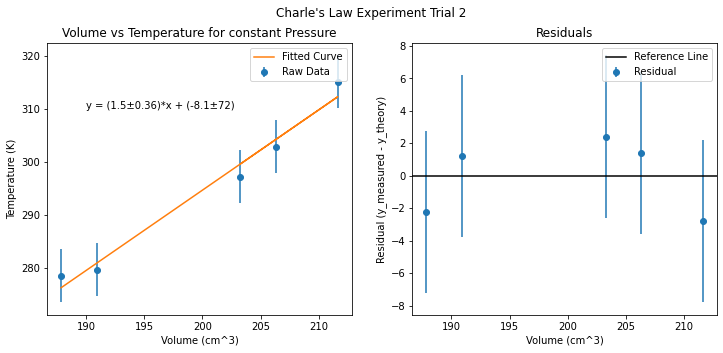

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle("Charle's Law Experiment Trial 2")
ax[0].set_title("Volume vs Temperature for constant Pressure")
ax[0].set_xlabel("Volume (cm^3)")
ax[0].set_ylabel("Temperature (K)")
ax[0].errorbar(volume_val, temp2, fmt="o", yerr= 5, label="Raw Data")
ax[0].plot(volume_val, y_pred, label="Fitted Curve")
ax[0].text(190, 310, "y = (1.5±0.36)*x + (-8.1±72)")
ax[1].set_title("Residuals")
ax[1].set_xlabel("Volume (cm^3)")
ax[1].set_ylabel("Residual (y_measured - y_theory)")
ax[1].errorbar(volume_val, res, fmt="o", yerr= 5, label="Residual")
ax[1].axhline(0, color="black", label="Reference Line")
ax[0].legend()
ax[1].legend()
fig.show()

In [11]:
da.correlation_coefficients(temp2, volume2)

0.988593612592359

# Rest of Experiments

In [26]:
height_markers3 = [44, 42, 39, 36, 32, 28]
volume3 = [volume_func(x/10) for x in height_markers3]
weight = [0, 50, 100, 150, 200, 300]

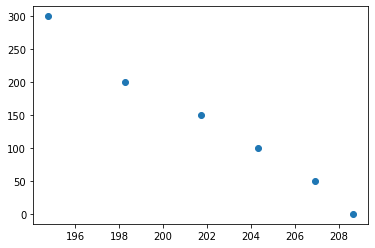

In [27]:
plt.scatter(volume3, weight)

In [28]:
da.correlation_coefficients(volume3, weight)

-0.9948469575220568

In [31]:
da.weighted_least_squares_linear(volume3, weight, np.ones(len(volume3)))

([-20.415427402788257, 4265.9666215499],
 [0.08496573200572331, 17.20420088406292],
 [array([  6.67267809,  42.01983769,  95.0405771 , 148.0613165 ,
         218.75563571, 289.44995491]),
  array([  6.67267809,  -7.98016231,  -4.9594229 ,  -1.9386835 ,
          18.75563571, -10.55004509])],
 [599.6393146979193])

In [33]:
height_markers4 = [69, 67, 65, 62, 59, 54]
volume4 = [volume_func(x/10) for x in height_markers4]
weight = [0, 50, 100, 150, 200, 300]

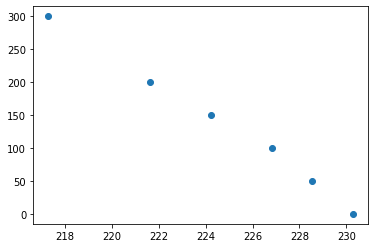

In [35]:
plt.scatter(volume4, weight)

In [36]:
da.correlation_coefficients(volume4, weight)

-0.9975280005098816

In [4]:
1/np.mean([26.19, 28.28, 31.2, 28.38, 33.05, 32.43])

0.03342059822870829

In [6]:
1/np.mean([8.31,
9.18,
11.83,
10.05,
9.84,
11.66,
10.55,
10.82])

0.09727626459143968

In [8]:
9/48.79

0.18446402951424473